In [1]:
!nvidia-smi

Fri Apr 17 12:52:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    Off  | 00000000:04:00.0 Off |                  N/A |
| 18%   34C    P0    56W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN X (Pascal)    Off  | 00000000:05:00.0 Off |                  N/A |
| 19%   36C    P0    55W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2, 3'
print('This programme is using GPU 2, 3')

This programme is using GPU 2, 3


In [3]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import MultiStepLR
from math import pi

import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
import sys
sys.path.append('../')

from utils.ImageDisplay import show_some, imshow
from utils.ModelSummary import summarize
from utils.storage import save_trained, load_trained
from utils.dataset import DifferentTargetSceneDataset

In [5]:
locs = ["scene_abandonned_city_54"]
train_dataset = DifferentTargetSceneDataset( locations = locs,
                                             data_path = '../../VIDIT/train/',
                                             input_colors = ["4500"],
                                             target_colors = ["4500"],
                                             transform = transforms.Resize(256)
                                             )
#test_dataset = ImageDataset( dataPath = '../../../VIDIT/validate/',
#                             transform = transforms.Resize(128))
train_dataloader = DataLoader(train_dataset, batch_size=70, shuffle=True, num_workers=8)
#test_dataloader = DataLoader(test_dataset, batch_size=50, shuffle=True, num_workers=8)

100%|██████████| 432/432 [00:00<00:00, 1184.96it/s]


In [6]:
from models.anOtherSwapNetSmaller import SwapModel
model = SwapModel().cuda()
model.init_weights()
#model.load_state_dict(torch.load('./OneImageDispNet_SouthEast2SouthWithDataLoader.pth'))
distance = nn.MSELoss().cuda() #We can modify this, eg input and output must have same edges, we should experiment differents ones
#scheduler = MultiStepLR(optimizer, milestones=[3000,8000,13000,18000], gamma=0.1) #divide learning rate by 10 at each milestone

In [7]:
#defining some params
num_epochs = 10 #you can go for more epochs
loss_history1 = []
loss_history5 = []


In [8]:
PATH = './Experiment2-Swap-Resize128-NtoN-Step0.pth'
torch.save(model.state_dict(), PATH)


In [9]:
model = SwapModel().cuda()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=0) #Weight Decay is L2 Regularization
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint)

<All keys matched successfully>

------------- training --------------- epoch: 1
input (90°, 4500K)


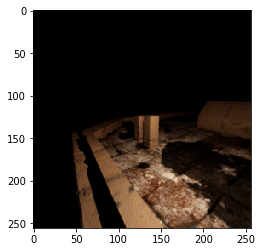

target (270°, 4500K)


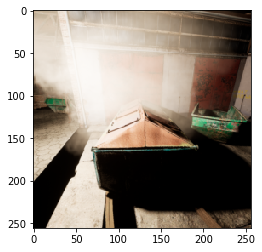

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction input 358.9°, 4617.4K


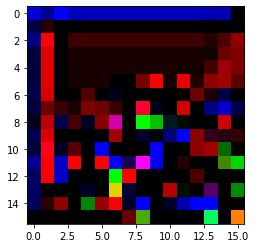

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction target 78.7°, 4824.2K


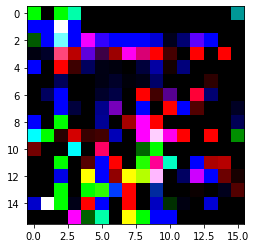

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction gt 49.4°, 5722.2K


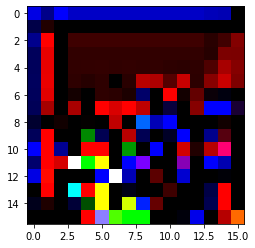

prediction gt


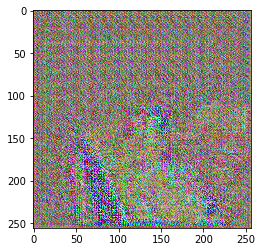

groundtruth (270°, 4500K)


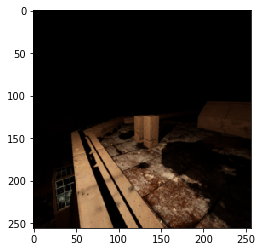

epoch [1/10], batch [1/2617], losses:0.2047, 0.0001, 0.0053, 142.1132, 91.5991, score:0.3128
epoch [1/10], batch [11/2617], losses:0.1043, 0.0001, 0.0049, 36.0093, 64.7069, score:0.7436
epoch [1/10], batch [21/2617], losses:0.0824, 0.0001, 0.0050, 43.0663, 56.7572, score:0.7473
epoch [1/10], batch [31/2617], losses:0.0659, 0.0000, 0.0049, 43.9600, 44.5392, score:0.9120
epoch [1/10], batch [41/2617], losses:0.0575, 0.0000, 0.0050, 51.4699, 38.1679, score:0.9256
epoch [1/10], batch [51/2617], losses:0.0589, 0.0000, 0.0049, 41.3335, 32.9901, score:1.0564
epoch [1/10], batch [61/2617], losses:0.0513, 0.0000, 0.0048, 39.9111, 31.5942, score:1.0405
epoch [1/10], batch [71/2617], losses:0.0546, 0.0001, 0.0050, 52.7704, 27.0991, score:1.1140
epoch [1/10], batch [81/2617], losses:0.0541, 0.0001, 0.0047, 53.5361, 28.8493, score:1.2036
epoch [1/10], batch [91/2617], losses:0.0471, 0.0000, 0.0047, 41.7985, 25.7992, score:1.1034
input (45°, 4500K)


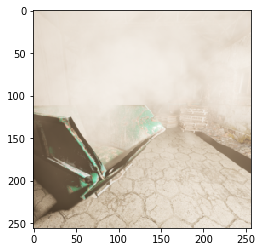

target (0°, 4500K)


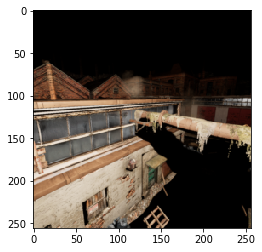

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction input 30.9°, 4491.0K


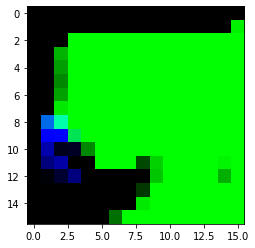

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction target 354.3°, 3700.9K


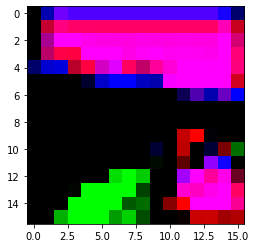

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction gt 337.5°, 4214.4K


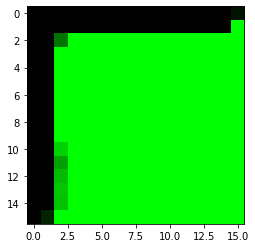

prediction gt


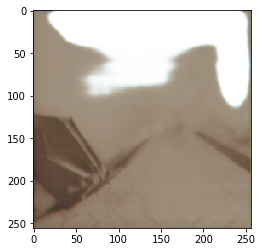

groundtruth (0°, 4500K)


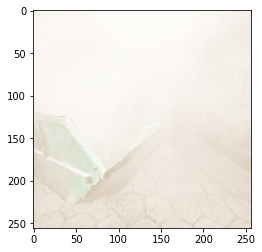

epoch [1/10], batch [101/2617], losses:0.0530, 0.0000, 0.0053, 66.6815, 31.3109, score:1.0641
epoch [1/10], batch [111/2617], losses:0.0560, 0.0001, 0.0054, 55.4910, 20.1402, score:1.2015
epoch [1/10], batch [121/2617], losses:0.0654, 0.0001, 0.0055, 42.3019, 25.9494, score:1.1278
epoch [1/10], batch [131/2617], losses:0.0534, 0.0001, 0.0051, 45.7190, 18.0196, score:1.1797
epoch [1/10], batch [141/2617], losses:0.0499, 0.0000, 0.0051, 40.5782, 17.3349, score:1.2004
epoch [1/10], batch [151/2617], losses:0.0533, 0.0001, 0.0048, 33.2335, 15.7950, score:1.2641
epoch [1/10], batch [161/2617], losses:0.0474, 0.0000, 0.0050, 33.2936, 18.9647, score:1.1718
epoch [1/10], batch [171/2617], losses:0.0552, 0.0000, 0.0051, 54.0075, 14.3213, score:1.2777
epoch [1/10], batch [181/2617], losses:0.0519, 0.0000, 0.0051, 49.8008, 12.0055, score:1.2561
epoch [1/10], batch [191/2617], losses:0.0500, 0.0000, 0.0045, 50.2769, 16.5511, score:1.2927
input (0°, 4500K)


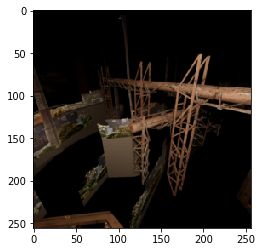

target (180°, 4500K)


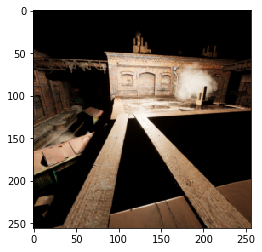

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction input 11.7°, 4549.3K


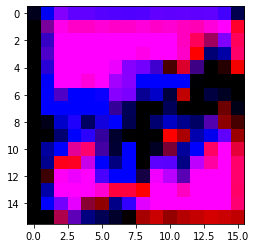

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction target 208.8°, 4514.7K


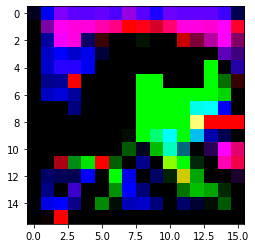

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction gt 176.4°, 4328.2K


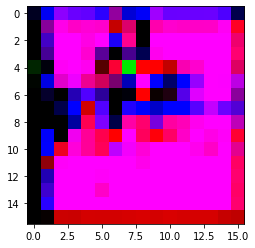

prediction gt


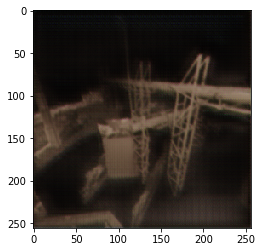

groundtruth (180°, 4500K)


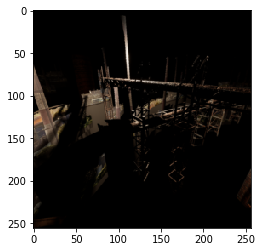

epoch [1/10], batch [201/2617], losses:0.0474, 0.0000, 0.0052, 57.2121, 16.3634, score:1.2492
epoch [1/10], batch [211/2617], losses:0.0548, 0.0001, 0.0048, 49.4774, 13.7520, score:1.2755
epoch [1/10], batch [221/2617], losses:0.0457, 0.0000, 0.0049, 46.3840, 13.8119, score:1.2629
epoch [1/10], batch [231/2617], losses:0.0412, 0.0000, 0.0046, 45.1454, 13.1731, score:1.1811
epoch [1/10], batch [241/2617], losses:0.0494, 0.0001, 0.0048, 37.5247, 12.3696, score:1.3324
epoch [1/10], batch [251/2617], losses:0.0536, 0.0001, 0.0051, 50.3719, 13.7747, score:1.3320
epoch [1/10], batch [261/2617], losses:0.0524, 0.0001, 0.0053, 40.2239, 17.0380, score:1.2478
epoch [1/10], batch [271/2617], losses:0.0454, 0.0000, 0.0049, 48.2048, 20.3832, score:1.2687
epoch [1/10], batch [281/2617], losses:0.0498, 0.0000, 0.0048, 48.0310, 15.5325, score:1.2602
epoch [1/10], batch [291/2617], losses:0.0484, 0.0000, 0.0050, 51.4286, 12.7124, score:1.1943
input (90°, 4500K)


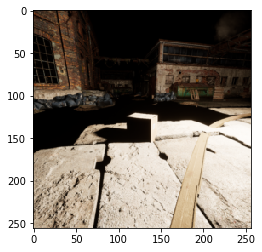

target (0°, 4500K)


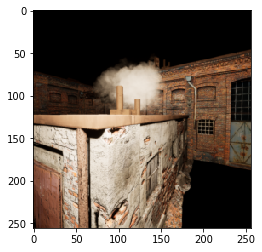

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction input 94.9°, 4202.3K


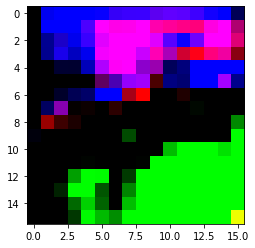

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction target 4.5°, 5121.0K


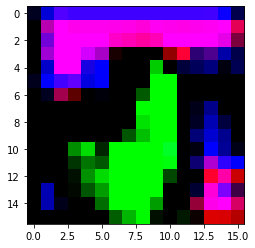

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction gt 2.6°, 4403.3K


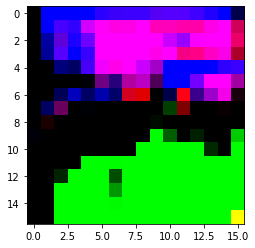

prediction gt


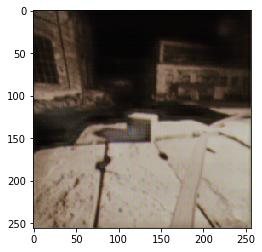

groundtruth (0°, 4500K)


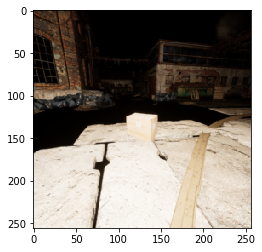

epoch [1/10], batch [301/2617], losses:0.0440, 0.0000, 0.0053, 42.6017, 12.3680, score:1.2358
epoch [1/10], batch [311/2617], losses:0.0571, 0.0001, 0.0050, 40.2460, 11.9748, score:1.3077
epoch [1/10], batch [321/2617], losses:0.0481, 0.0000, 0.0047, 39.4691, 13.1561, score:1.2975
epoch [1/10], batch [331/2617], losses:0.0484, 0.0000, 0.0051, 38.6797, 11.1331, score:1.2620
epoch [1/10], batch [341/2617], losses:0.0451, 0.0000, 0.0052, 42.0428, 15.7949, score:1.3759
epoch [1/10], batch [351/2617], losses:0.0423, 0.0000, 0.0049, 51.0584, 12.1928, score:1.2929
epoch [1/10], batch [361/2617], losses:0.0551, 0.0000, 0.0050, 50.5827, 13.6133, score:1.1887
epoch [1/10], batch [371/2617], losses:0.0508, 0.0001, 0.0045, 33.1571, 14.1696, score:1.3358
epoch [1/10], batch [381/2617], losses:0.0512, 0.0000, 0.0049, 54.7955, 13.4765, score:1.1448
epoch [1/10], batch [391/2617], losses:0.0420, 0.0000, 0.0048, 41.2042, 15.9724, score:1.3348
input (135°, 4500K)


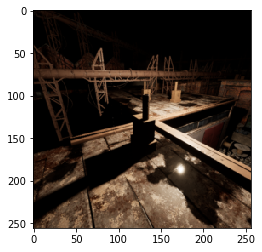

target (90°, 4500K)


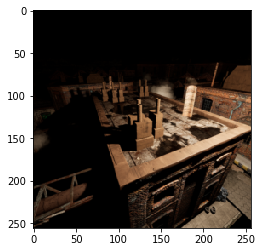

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction input 123.2°, 4733.2K


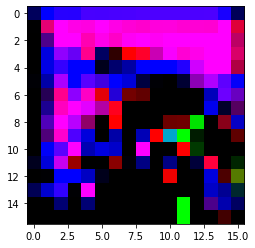

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction target 88.3°, 5830.0K


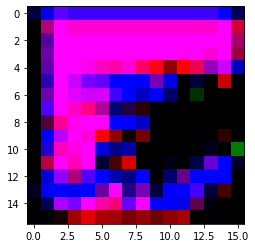

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction gt 83.5°, 4882.8K


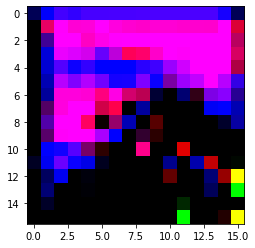

prediction gt


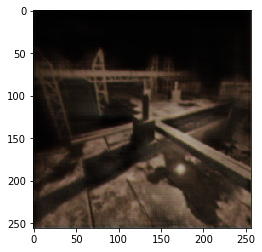

groundtruth (90°, 4500K)


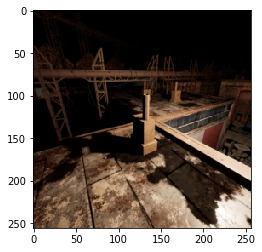

epoch [1/10], batch [401/2617], losses:0.0543, 0.0001, 0.0048, 42.7080, 11.4905, score:1.3460
epoch [1/10], batch [411/2617], losses:0.0442, 0.0000, 0.0054, 32.0017, 13.7395, score:1.2805
epoch [1/10], batch [421/2617], losses:0.0528, 0.0001, 0.0053, 49.8182, 11.8503, score:1.3319
epoch [1/10], batch [431/2617], losses:0.0399, 0.0000, 0.0046, 30.5581, 15.1203, score:1.2959
epoch [1/10], batch [441/2617], losses:0.0442, 0.0000, 0.0047, 39.2161, 12.6672, score:1.2184
epoch [1/10], batch [451/2617], losses:0.0412, 0.0000, 0.0051, 51.3617, 13.7156, score:1.3246
epoch [1/10], batch [461/2617], losses:0.0531, 0.0001, 0.0049, 44.9748, 11.9684, score:1.3337
epoch [1/10], batch [471/2617], losses:0.0421, 0.0000, 0.0050, 48.1790, 8.8528, score:1.3684
epoch [1/10], batch [481/2617], losses:0.0427, 0.0000, 0.0046, 50.4802, 10.3662, score:1.2699
epoch [1/10], batch [491/2617], losses:0.0528, 0.0001, 0.0049, 37.4872, 11.4809, score:1.3427
input (225°, 4500K)


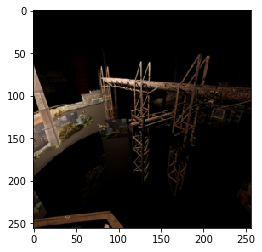

target (0°, 4500K)


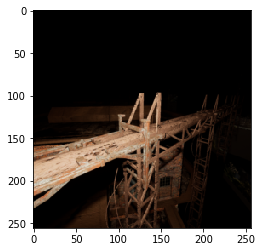

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction input 238.8°, 3941.9K


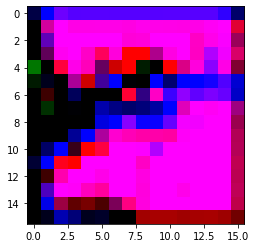

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction target 11.7°, 4390.7K


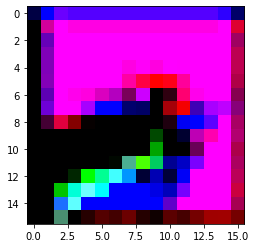

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction gt 3.8°, 4607.4K


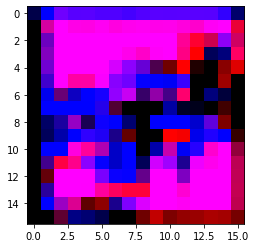

prediction gt


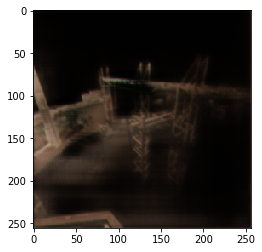

groundtruth (0°, 4500K)


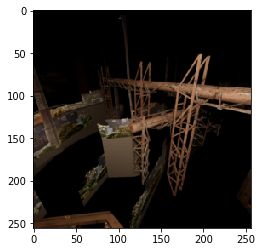

epoch [1/10], batch [501/2617], losses:0.0502, 0.0001, 0.0050, 53.6008, 9.6187, score:1.3655
epoch [1/10], batch [511/2617], losses:0.0458, 0.0000, 0.0049, 41.3714, 10.9179, score:1.2380
epoch [1/10], batch [521/2617], losses:0.0450, 0.0000, 0.0051, 52.4599, 9.1512, score:1.3288
epoch [1/10], batch [531/2617], losses:0.0428, 0.0000, 0.0052, 66.0006, 11.4052, score:1.2937
epoch [1/10], batch [541/2617], losses:0.0451, 0.0001, 0.0045, 43.6141, 9.2016, score:1.3629
epoch [1/10], batch [551/2617], losses:0.0416, 0.0000, 0.0050, 48.2619, 8.8823, score:1.3701
epoch [1/10], batch [561/2617], losses:0.0387, 0.0000, 0.0051, 44.1284, 9.2440, score:1.3276
epoch [1/10], batch [571/2617], losses:0.0454, 0.0001, 0.0050, 38.6677, 9.6167, score:1.4081
epoch [1/10], batch [581/2617], losses:0.0400, 0.0001, 0.0046, 63.9515, 11.5705, score:1.5153
epoch [1/10], batch [591/2617], losses:0.0466, 0.0001, 0.0049, 49.9915, 11.0105, score:1.3617
input (225°, 4500K)


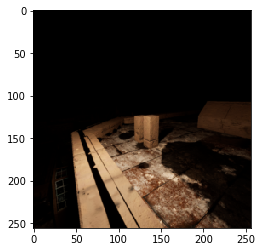

target (180°, 4500K)


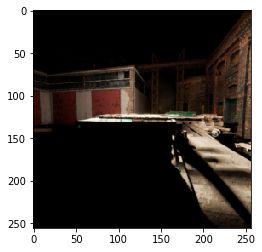

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction input 223.6°, 4249.9K


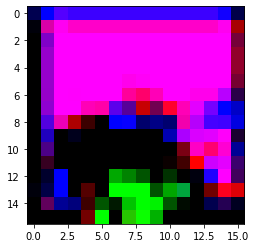

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction target 176.8°, 6212.9K


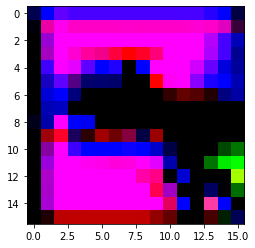

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction gt 191.0°, 4400.7K


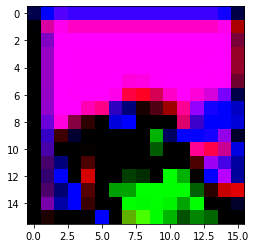

prediction gt


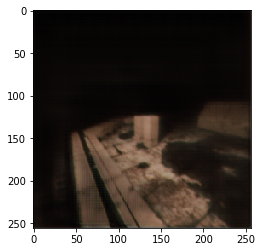

groundtruth (180°, 4500K)


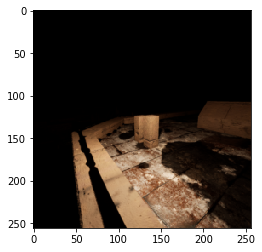

epoch [1/10], batch [601/2617], losses:0.0356, 0.0000, 0.0050, 53.8785, 7.7024, score:1.2768
epoch [1/10], batch [611/2617], losses:0.0430, 0.0000, 0.0048, 43.1886, 11.5021, score:1.3458
epoch [1/10], batch [621/2617], losses:0.0478, 0.0001, 0.0053, 36.8006, 9.6153, score:1.4373
epoch [1/10], batch [631/2617], losses:0.0428, 0.0001, 0.0050, 47.0653, 10.4567, score:1.4872
epoch [1/10], batch [641/2617], losses:0.0469, 0.0000, 0.0051, 67.9705, 10.3344, score:1.2700
epoch [1/10], batch [651/2617], losses:0.0457, 0.0000, 0.0050, 53.7922, 9.0639, score:1.3502


In [ ]:
def angle(angle1, angle2):
    # https://discuss.pytorch.org/t/custom-loss-function-for-discontinuous-angle-calculation/58579
    return torch.mean(1. - torch.cos((angle1 - angle2)/180.*pi))

def angle_bis(angle1, angle2):
    # https://discuss.pytorch.org/t/custom-loss-function-for-discontinuous-angle-calculation/58579
    a = angle1%360 - angle2%360
    a = (a + 180) % 360 - 180
    return torch.mean(torch.abs(a))
    

def train(epoch):
    print('------------- training --------------- epoch:', epoch+1)
    epoch_loss = 0
    for i,data in enumerate(train_dataloader):
        inp, out = data
        img1 = inp[0]['image'].cuda()
        img2 = inp[1]['image'].cuda()
        groundtruth = out['image'].cuda()
        # ===================forward=====================
        scene_gt, scene_img1, scene_img2,\
        illumination_gt, illumination_img1, illumination_img2,\
        ill_pred_gt, ill_pred_img1, ill_pred_img2,\
        prediction = model(img1, img2, groundtruth)        
        loss1 = 1.  *distance(prediction, groundtruth) 
        loss2 = .01   *distance(F.normalize(scene_gt), F.normalize(scene_img1))
        loss3 = .01   *distance(F.normalize(illumination_gt), F.normalize(illumination_img2))
        loss4 = .0001 *distance(4500.+2000.*ill_pred_gt[:,1], (1.*out['color']).cuda())
        loss5 = 1/3   *(angle_bis(180.*ill_pred_gt[:,0], (1.*out['direction']).cuda())+angle_bis(180.*ill_pred_img1[:,0], (1.*inp[0]['direction']).cuda())+angle_bis(180.*ill_pred_img2[:,0], (1.*inp[1]['direction']).cuda()))
        #print(loss1, loss2, loss3, loss4, loss5)
        #loss = loss1 + loss2 + loss3 + loss4 + loss5
        loss = loss5 + loss1
        loss_history1.append(loss1.item())
        loss_history5.append(loss5.item())
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        # ===================log========================
        epoch_loss += 1000*loss.data
        if i%100==0: 
            print("input ({}°, {}K)".format(inp[0]['direction'][0].item(), inp[0]['color'][0].item()))
            implotin = plt.imshow(inp[0]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("target ({}°, {}K)".format(inp[1]['direction'][0].item(), inp[1]['color'][0].item()))
            implotin2 = plt.imshow(inp[1]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("prediction input {:.1f}°, {:.1f}K".format(180.*ill_pred_img1[0,0].item()%360, 4500.+2000.*ill_pred_img1[0,1].item()))
            implotinill = plt.imshow(illumination_img1.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("prediction target {:.1f}°, {:.1f}K".format(180.*ill_pred_img2[0,0].item()%360, 4500.+2000.*ill_pred_img2[0,1].item()))
            implotin2ill = plt.imshow(illumination_img2.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("prediction gt {:.1f}°, {:.1f}K".format(180.*ill_pred_gt[0,0].item()%360, 4500.+2000.*ill_pred_gt[0,1].item()))
            implotgtill = plt.imshow(illumination_gt.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("prediction gt")
            implotpred = plt.imshow(prediction.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("groundtruth ({}°, {}K)".format(out['direction'][0].item(), out['color'][0].item()))
            implotgt = plt.imshow(groundtruth.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
        if i%10==0: 
            score = 1.*distance(inp[0]['image'].cuda(), groundtruth).data / loss1.data #how well I did compared to output=input
            print('epoch [{}/{}], batch [{}/{}], losses:{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, score:{:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataloader), loss1.data, loss2.data, loss3.data, loss4.data, loss5.data, score))


for epoch in range(num_epochs):
    train(epoch)
    if epoch%1 == 0:
        PATH = './Experiment2-Swap-Resize128-NtoN'+str(epoch)+'.pth'
        torch.save(model.state_dict(), PATH)
        
        
        
print('Finished Training')

In [ ]:
PATH = './Experiment2-Swap-Resize128-NtoN-Step1.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
plt.plot(loss_history1)
plt.ylabel('MSE(prediction, groundtruth)')
plt.show()

In [ ]:
plt.plot(loss_history5)
plt.ylabel('abs(angle(real_direction,predicted_direction))')
plt.show()